<a href="https://colab.research.google.com/github/wendyxie6/python-learning-journal/blob/main/HW1_Numpy_Matplotlib_Signal_Processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Signal Processing Adventure: Outlier Detection!**


Sometimes, when collecting data from sensors in the real world, the environment or hardware can cause strange spikes in the signal — these are called **outliers**. These outliers can distort our analysis, so we need a way to detect and fix them.

In this project, we will investigate a noisy signal, identify suspicious outliers, and replace them with smoother, more reasonable values.

Import NumPy and matplotlib libraries

In [121]:
import numpy as np
import matplotlib.pyplot as plt

## activate_sensor function
This function called `activate_sensor` function generates the synthetic sensor data used in this assignment. You do not need to examine or modify this code to complete the homework, but you are welcome to explore it if you are curious.

In [135]:
def activate_sensor():

  np.random.seed(42)  # For reproducibility

  # Base signal: sine wave with a little noise
  x = np.linspace(0, 6 * np.pi, 3500)
  signal = np.sin(x) + 0.05 #* np.random.randn(len(x))

  # Inject artificial outliers (spikes) between 500 and 700
  signal[530] += 1.0
  signal[550] += 1.2
  signal[565] -= 1.1
  signal[580] += 0.9
  signal[600] -= 1.3

  # Save for later comparison
  raw_signal = signal.copy()

  return raw_signal


## **Step 1: Activate the Sensor and Load the Signal**

Choose a variable name and load the data by calling the `activate_sensor` function.

In [76]:
index = np.arange(0,3500)

When working with data, it is always a good practice to check the type and the shape of the data.

In [77]:
type(index)

numpy.ndarray

In [ ]:
# DON'T WRITE HERE, DON'T RUN THIS CELL

type: <class 'numpy.ndarray'> ,  shape: (3500,)


# **Step 2: Visualize the Raw Signal**

Always visualize your data before processing it. Plot the data and inspect it carefully.



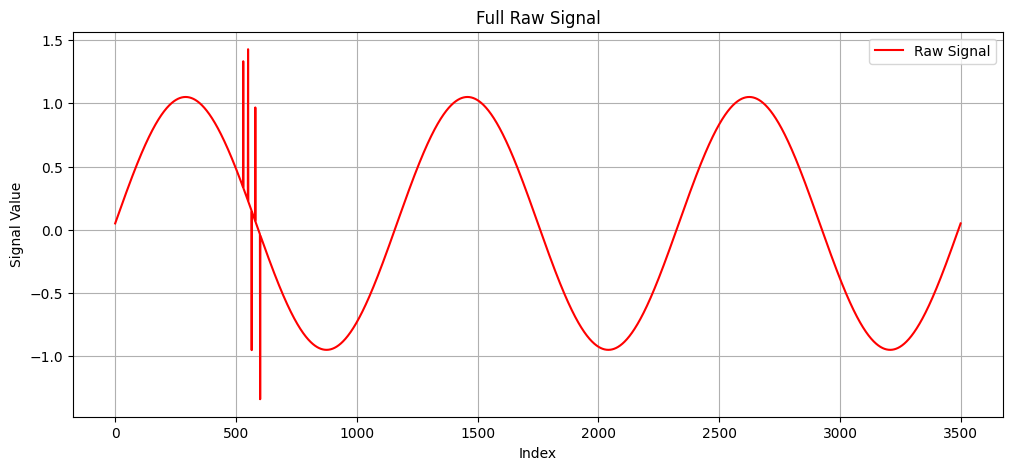

In [137]:
np.random.seed(42)
x = np.linspace(0, 6 * np.pi, 3500)
index = np.arange(0,3500)
signal = np.sin(x) + 0.05
signal[530] += 1.0
signal[550] += 1.2
signal[565] -= 1.1
signal[580] += 0.9
signal[600] -= 1.3

plt.figure(figsize=(12, 5))
plt.plot(index, signal_zm, color = "red", label="Raw Signal")
plt.title("Full Raw Signal")
plt.xlabel("Index")
plt.ylabel("Signal Value")
plt.grid(True, linestyle='-', alpha=1)
plt.legend(loc="upper right")




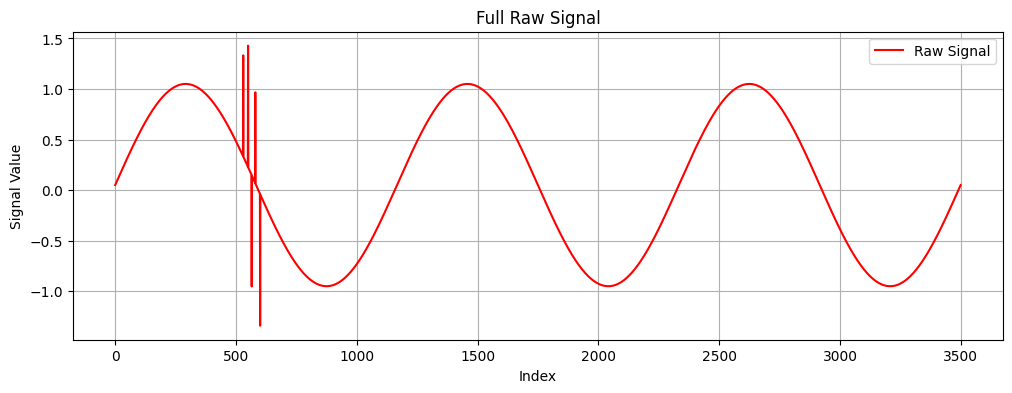

In [ ]:
# DON'T WRITE HERE, DON'T RUN THIS CELL

You may notice some unusual spikes in the signal. To examine them more closely, zoom in on the region between 500 and 700.

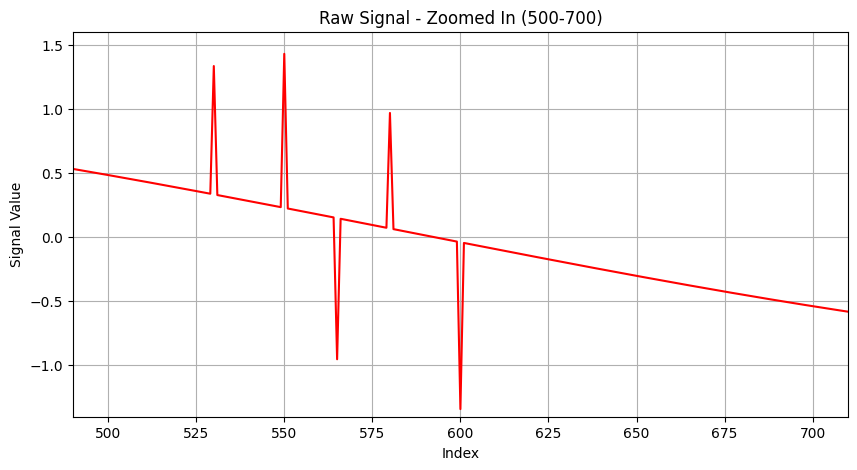

In [138]:
np.random.seed(42)
x = np.linspace(0, 6 * np.pi, 3500)
index = np.arange(0, 3500)
signal = np.sin(x) + 0.05
signal[530] += 1.0
signal[550] += 1.2
signal[565] -= 1.1
signal[580] += 0.9
signal[600] -= 1.3


plt.figure(figsize=(10, 5))
plt.plot(index, signal, color = "red")
plt.xlim(490, 710)
plt.ylim(-1.4, 1.6)
plt.title("Raw Signal - Zoomed In (500-700)")
plt.xlabel("Index")
plt.ylabel("Signal Value")
plt.grid(True, linestyle='-', alpha=1)


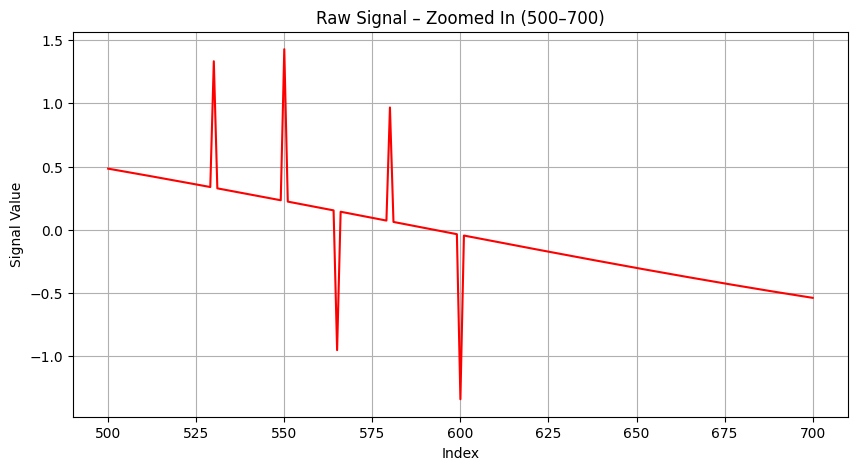

In [ ]:
# DON'T WRITE HERE, DON'T RUN THIS CELL

# **Step 3: Outlier Detection Strategy**


To decide whether a data point is an outlier, we compare the value of the point to the local average computed from its neighboring points. If the difference between the point and this local average is sufficiently large, the point is considered a potential outlier.

**Method:** We use a **5-point moving average**, where the average is computed from the two neighboring points on each side of the current index.

Here's the math:

Mean with current point:

$$
\mu_{\text{with}}(j) = \frac{1}{5} \left[ s(j-2) + s(j-1) + s(j) + s(j+1) + s(j+2) \right]
$$

Mean without current point:

$$
\mu_{\text{without}}(j) = \frac{1}{4} \left[ s(j-2) + s(j-1) + s(j+1) + s(j+2) \right]
$$



If:

$$
\left| \mu_{\text{with}}(j) - \mu_{\text{without}}(j) \right| > \text{threshold}
$$

Then:

$$
\text{filtered}(j) = \mu_{\text{without}}(j)
$$

Otherwise, we keep the original value.

⚠️ Note: We only apply this between indices 502 and 698, because we need two neighbors on both sides to compute the 5-point window.



# **Step 4: Apply the Filter**


**Your task:**
Implement the outlier-detection algorithm described above and choose an appropriate threshold that removes the outliers while preserving the underlying signal.

**Hint:** The threshold should be large enough to ignore normal signal fluctuations, but small enough to detect the abnormal spikes.


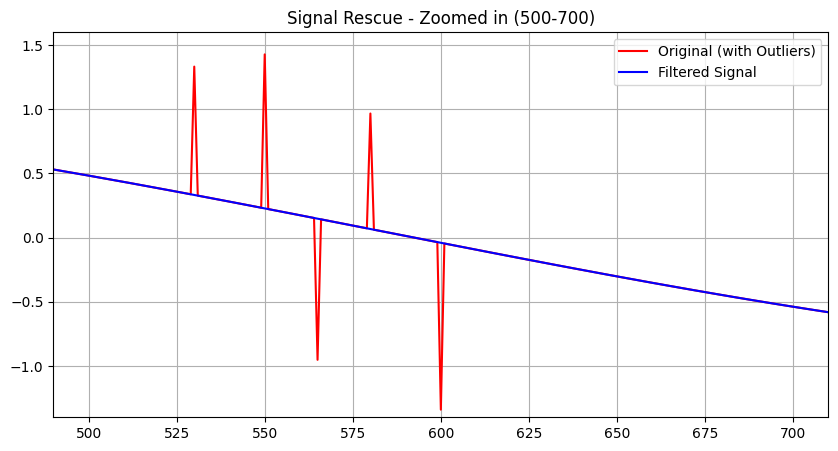

array([0.05      , 0.0553871 , 0.06077404, ..., 0.03922596, 0.0446129 ,
       0.05      ])

In [149]:
threshold = 0.1
filtered_signal = signal.copy()

for j in range(502, 698):
    # Mean with current point:
    mean_with = (signal[j-2] + signal[j-1] + signal[j] + signal[j+1] + signal[j+2])/5

    # Mean without current point:
    mean_without = (signal[j-2] + signal[j-1] + signal[j+1] + signal[j+2])/4

    if abs(mean_with - mean_without) > threshold:
        filtered_signal[j] = mean_without



plt.figure(figsize=(10, 5))
plt.plot(index, signal, color = "red", label="Original (with Outliers)")
plt.plot(index, filtered_signal, color="blue", label="Filtered Signal")
plt.xlim(490, 710)
plt.ylim(-1.4, 1.6)
plt.title("Signal Rescue - Zoomed in (500-700)")
plt.legend()
plt.grid(True)
plt.show()





# **Step 5: Compare the Results**

Overlay the original signal and the corrected signal to visualize the effect of the outlier removal, and generate the following plots.

ValueError: x and y must have same first dimension, but have shapes (3500,) and (1,)

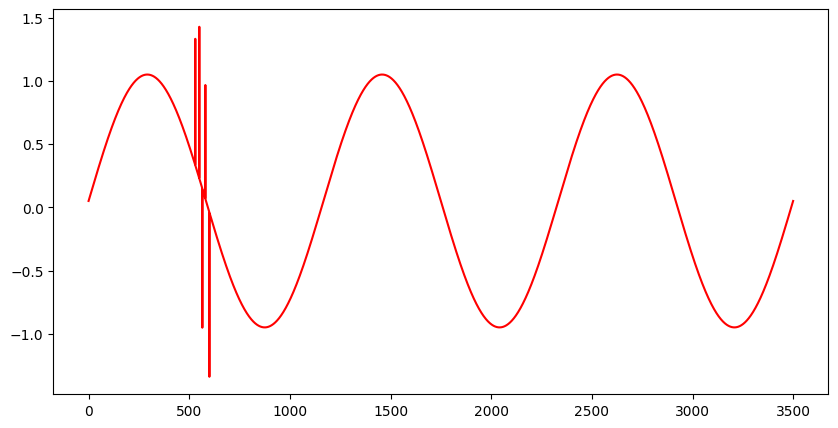

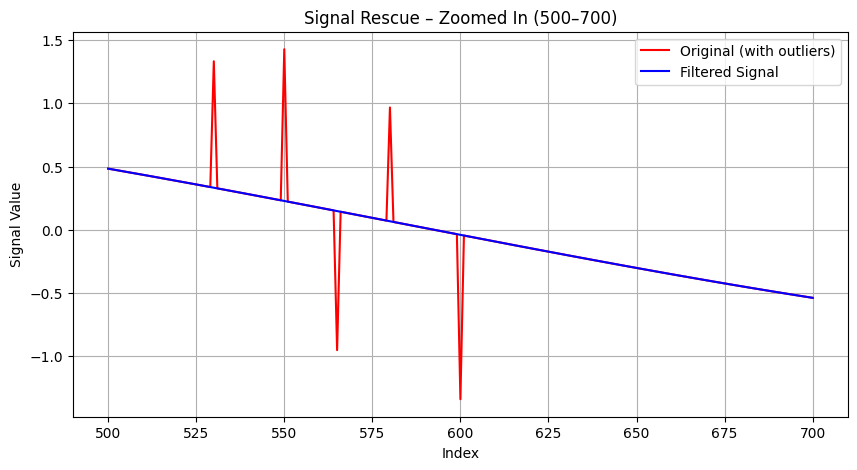

In [ ]:
# DON'T WRITE HERE, DON'T RUN THIS CELL


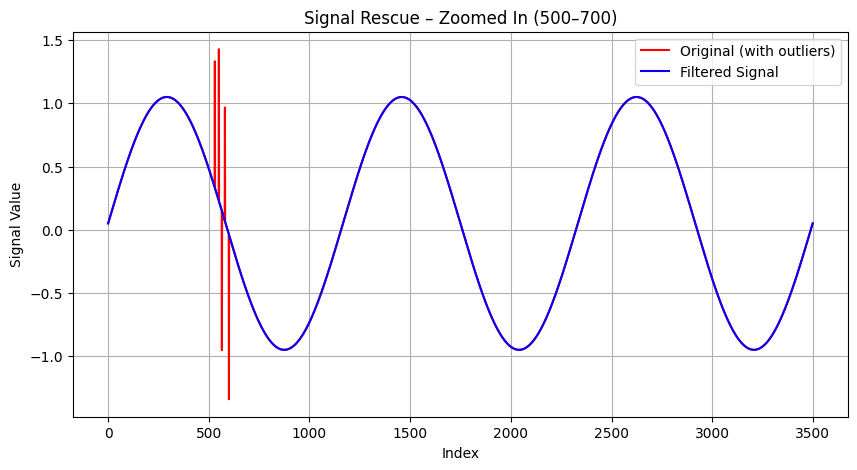

In [ ]:

# DON'T WRITE HERE, DON'T RUN THIS CELL